<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="HEIG-VD Logo" width="100" align="right" /> 

# Cours TAL - Laboratoire 4<br/>Reconnaissance des entités nommées

**Objectif**

L'objectif de ce labo est de comparer la reconnaissance des entités nommées (*named entity recognition*, NER) faite par spaCy avec celle faite par NLTK, sur des données en anglais fournies sur Cyberlearn.  Veuillez fournir les scores de rappel, précision et F1-score pour chacun des tags présents dans les données de test.  Veuillez comparer deux modèles de spaCy, 'en_core_web_sm' et 'en_core_web_lg'.

Vous pouvez concevoir l'ensemble du projet par vous-mêmes, ou suivre les indications suivantes.

## 1. NER avec spaCy et NLTK sur un texte court

In [249]:
import spacy
from spacy.tokens import Doc

In [2]:
# !python -m spacy download en_core_web_sm 
# exécuter la ligne ci-dessus une fois, si nécessaire

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 435.7 kB/s eta 0:00:30
     --------------------------------------- 0.1/12.8 MB 491.5 kB/s eta 0:00:26
     - -------------------------------------- 0.5/12.8 MB 3.0 MB/s eta 0:00:05
     --- ------------------------------------ 1.2/12.8 MB 5.3 MB/s eta 0:00:03
     ------- -------------------------------- 2.5/12.8 MB 9.4 MB/s eta 0:00:02
     ----------- ---------------------------- 3.6/12.8 MB 11.5 MB/s eta 0:00:01
     -------------- ------------------------- 4.6/12.8 MB 12.8 MB/s eta 0:00:01
     ----------------- ---------------------- 5.6/12.8 MB 13.8 MB/s eta 0:00:01
     --------------------- ------------------ 6.8/12.8 MB 14.5 MB/s eta 0:00:01
     ------------------------- -------------- 8.0/12.8 MB 16.1 MB/s eta 0:00:01
     ----------------------------- ---------- 9.3/12.8 MB 1

In [250]:
nlp = spacy.load("en_core_web_sm")

In [251]:
raw_text = "Reinhold Messner made a solo ascent of Mount Everest and was later a member of the European Parliament." 

**1a.** Veuillez traiter ce texte avec la pipeline 'nlp', et pour chaque entité nommée trouvée veuillez afficher les mots qui la composent et son type.

In [252]:
doc = nlp(raw_text)
for entity in doc.ents:
    print(f"{entity.text} [{entity.label_}]")

Reinhold Messner [PERSON]
Mount Everest [LOC]
the European Parliament [ORG]


In [253]:
import nltk
nltk.download('maxent_ne_chunker') 
nltk.download('words') 
# exécuter les deux lignes ci-dessus une fois, si nécessaire

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\babac\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\babac\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

**1b.** Veuillez effectuer avec NLTK la tokenization, le POS tagging et le *NE chunking* (voir la [documentation NLTK](https://www.nltk.org/api/nltk.chunk.ne_chunk.html#nltk.chunk.ne_chunk)).  Veuillez afficher le résultat et indiquer son type.

In [254]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\babac\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [255]:

tokens = word_tokenize(raw_text)
pos_tags = pos_tag(tokens)
ne_chunks = ne_chunk(pos_tags)

# Afficher le résultat et son type
print(ne_chunks)

(S
  (PERSON Reinhold/NNP)
  (PERSON Messner/NNP)
  made/VBD
  a/DT
  solo/JJ
  ascent/NN
  of/IN
  (PERSON Mount/NNP Everest/NNP)
  and/CC
  was/VBD
  later/RB
  a/DT
  member/NN
  of/IN
  the/DT
  (ORGANIZATION European/NNP Parliament/NNP)
  ./.)


**1c.** Veuillez afficher, pour chaque entité nommée, les mots qui la composent et son type.  Vous pouvez parcourir le résultat précédent avec une boucle for, et déterminer si un noeud a une étiquette avec la fonction `hasattr(noeud, 'label')`.

In [256]:
for c in ne_chunks:
    if hasattr(c, 'label'):
        words = [word for word, tag in c.leaves()]
        ne_type = c.label()
        print("Mots:", " ".join(words))
        print("Type:", ne_type)
        

Mots: Reinhold
Type: PERSON
Mots: Messner
Type: PERSON
Mots: Mount Everest
Type: PERSON
Mots: European Parliament
Type: ORGANIZATION


**1d.** À ce stade, que pensez-vous de la qualité des résultats de chaque système ?

In [10]:
# Spacy donne des résultats correctes et à correctement identifier les entités nommées. Cependant, NLTK indique que "Reinhold Messner" sont deux personnes distinctes et que le Mont Everest est une personne. IL semble, à ce stade, moins efficace que Spacy.

## 2. Prise en main des données de test

**2a.** Quel est le format du fichier `eng.test.a.conll` ?  Quelle information contient chaque colonne ?  Quel est le format des tags NE ?

Note : ce fichier fait partie des données de test pour la NER sur l'anglais de la conférence [CoNLL](https://www.clips.uantwerpen.be/pages/past-workshops) 2003. On peut lire [ici](https://www.clips.uantwerpen.be/conll2003/ner/) la description de la tâche et les scores obtenus.  On peut trouver une copie des données [ici](https://sourceforge.net/p/text-analysis/svn/1243/tree/text-analysis/trunk/Corpora/CoNLL/2003/) ou [ici](https://github.com/synalp/NER/tree/master/corpus/CoNLL-2003).  Les textes proviennent du [corpus Reuters](http://trec.nist.gov/data/reuters/reuters.html).

In [11]:
# Le fichier consiste en plusieurs documents, séparés par un -DOCSTART-. Chaque document consiste en une série de phrase, séparée par deux retours à la ligne.
# Chaque ligne d'une phrase est le mot de la phrase. Chaque ligne suit la structure suivante :
# [mot] [POS Tag] [Chunk] [Tag d'entité nommée: I|O]
# Si le dernier tag est O : ce n'est pas une entitée nommée. Si c'est I, le tag indique le type d'entitée nommé (ORG, PER, LOC, ...)

**2b.** Veuillez charger les données de `eng.test.a.conll` grâce à la classe `ConllCorpusReader` de NLTK vue dans les labos précédents (voir [documentation](https://www.nltk.org/api/nltk.corpus.reader.conll.html#nltk.corpus.reader.conll.ConllCorpusReader)). Veuillez lire les colonnes qui contiennent les tokens ('words'), les POS tags ('pos') et les informations sur les entités nommées ('chunk') et afficher les trois premières phrases, accessibles via la méthode `.iob_sents()`.

In [257]:
from nltk.corpus.reader.conll import ConllCorpusReader

conll_reader = ConllCorpusReader('.', '.*\.conll', columntypes=['words', 'pos', 'chunk', 'ne'], separator=' ')
sentences = conll_reader.iob_sents("./eng.test.a.conll")[1:]
print("WORD POS CHUNK")
print("==============")
for sentence in sentences[:3]:
    for tagged_word in sentence:
        print(f"{tagged_word[0]} {tagged_word[1]} {tagged_word[2]}")
    print()




WORD POS CHUNK
CRICKET NNP I-NP
- : O
LEICESTERSHIRE NNP I-NP
TAKE NNP I-NP
OVER IN I-PP
AT NNP I-NP
TOP NNP I-NP
AFTER NNP I-NP
INNINGS NNP I-NP
VICTORY NN I-NP
. . O

LONDON NNP I-NP
1996-08-30 CD I-NP

West NNP I-NP
Indian NNP I-NP
all-rounder NN I-NP
Phil NNP I-NP
Simmons NNP I-NP
took VBD I-VP
four CD I-NP
for IN I-PP
38 CD I-NP
on IN I-PP
Friday NNP I-NP
as IN I-PP
Leicestershire NNP I-NP
beat VBD I-VP
Somerset NNP I-NP
by IN I-PP
an DT I-NP
innings NN I-NP
and CC O
39 CD I-NP
runs NNS I-NP
in IN I-PP
two CD I-NP
days NNS I-NP
to TO I-VP
take VB I-VP
over IN I-PP
at IN B-PP
the DT I-NP
head NN I-NP
of IN I-PP
the DT I-NP
county NN I-NP
championship NN I-NP
. . O



**2c.** Veuillez préparer les données pour le test, en ne gardant que les phrases ayant au moins trois (3) tokens (pas 0, 1, 2) :

* une variable `test_tokens` contiendra les tokens groupés par phrase (liste de listes de strings)
* une variable `test_tags` contiendra les tags NE en une seule liste (en vue de l'évaluation)

In [258]:
# grids: [sentence][words][column]
grids = conll_reader._grids("./eng.test.a.conll")
filtered_sentences = [sentence for sentence in grids if (len(sentence) >= 3)]
test_tokens = [[word for word, _, _, _ in sentence] for sentence in filtered_sentences]
test_tags = []
for sentence in filtered_sentences:
    for word in sentence:
        test_tags.append(word[3])



**2d.** Combien d'occurrences de tags contient `test_tags`?  Combien de tags différents y a-t-il, et lesquels sont-ils ?  Combien il y a d'occurrences de tags de chaque type ?  Combien de phrases y a-t-il dans `test_tokens` ?

In [259]:
# Combien d'occurrences de tags contient test_tags?
print("Nombre de tag :", len(test_tags))

# Combien de tags différents y a-t-il, et lesquels sont-ils ?
unique_tags = set(test_tags)
print("Nbre de tags différents :", len(unique_tags))
print("Tags différents :", unique_tags)

# Combien il y a d'occurrences de tags de chaque type ?
occurrences_per_tag = {tag: test_tags.count(tag) for tag in unique_tags}
print("Occurences de tags par type:", occurrences_per_tag)

# Combien de phrases y a-t-il dans test_tokens ?
print("Nombre de phrases dans test_tokens:", len(test_tokens))

# Il semble y avoir une erreur dans le fichier connl : un 'o', qui devrait être 'O'. Le fichier a été corrigé.



Nombre de tag : 50817
Nbre de tags différents : 5
Tags différents : {'I-PER', 'O', 'I-ORG', 'I-MISC', 'I-LOC'}
Occurences de tags par type: {'I-PER': 3097, 'O': 42474, 'I-ORG': 2080, 'I-MISC': 1228, 'I-LOC': 1938}
Nombre de phrases dans test_tokens: 2970


## 3. Performances de NLTK pour la NER

**3a.** Le NER de NLTK a un jeu de tags différents de celui des données de test.  Veuillez chercher les informations pour compléter la fonction suivante qui convertir chaque tag du NER de NLTK dans le tag correspondant pour les données de test.  Attention à la logique des conversions. 

In [260]:

# src : https://www.nltk.org/book/ch07.html
def convert_nltk_conll(tag):
    corresp = {
        'O': 'O',  # Pas une entité nommée
        'ORGANIZATION': 'I-ORG',  # Organisation
        'PERSON': 'I-PER',  # Personne
        'LOCATION' : 'I-LOC', # Lieu
        'GPE' : 'I-LOC', # Lieu (entitée géopolitique)
        'FACILITY' : 'I-LOC',
        # Les NE suivantes ne sont pas présentes dans les données de référence
        'DATE' : 'O',
        'TIME' : 'O',
        'PERCENT' : 'O',
    }

    return corresp.get(tag, 'I-MISC')


**3b.** Veuillez exécuter la NER de NLTK sur chacune des phrases de `test_tokens`, ce qui assure que NLTK aura la même tokenisation que les données de référence.  Veuillez stocker les tags dans une liste unique appelée `nltk_tags`.

In [261]:
nltk_tags = []
for sentence in test_tokens:
    chunks = ne_chunk(pos_tag(sentence))
    for chunk in chunks:
        if hasattr(chunk, "label"):
            # Répète l'ajout autant de tag qu'il y a de mot dans l'entité denommé
            for _ in chunk.leaves():
                nltk_tags.append(chunk.label())
        else:
            nltk_tags.append("O")
            


**3c.** Veuillez convertir les tags de `nltk_tags` grâce à la fonction précédente, dans une liste appelée `nltk_tags_conv`.  Veuillez afficher le nombre total de tags et les dix premiers.  Vous pouvez plusieurs essais en changeant la fonction, pour aboutir à la conversion qui maximise le score.

In [262]:
nltk_tags_conv = [convert_nltk_conll(tag) for tag in nltk_tags]

print("Nombre de tags : ", len(nltk_tags_conv))
print("Dix premiers tags : ", nltk_tags_conv[0:10])

Nombre de tags :  50817
Dix premiers tags :  ['I-LOC', 'O', 'I-ORG', 'O', 'O', 'O', 'I-ORG', 'O', 'I-ORG', 'O']


**3d.** Veuillez afficher le rapport d'évaluation de classification obtenu de Scikit-learn et la matrice de confusion pour tous les types de tags apparaissant dans les données de test.

In [263]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
unique_tags = list(unique_tags)


[]

<Figure size 1000x800 with 0 Axes>

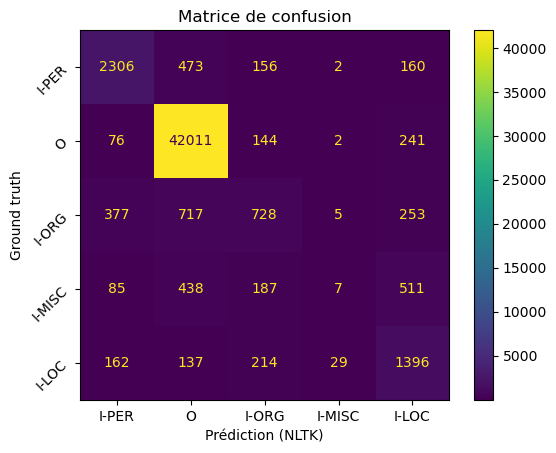

In [264]:

conf_matrix = confusion_matrix(test_tags, nltk_tags_conv, labels=unique_tags)
plt.figure(figsize=(10, 8))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_tags)
disp.plot()

plt.title('Matrice de confusion')
plt.ylabel('Ground truth')
plt.xlabel('Prédiction (NLTK)')
plt.yticks(rotation=45)
plt.grid(False)
plt.plot()

In [265]:
# Créer un rapport d'évaluation de classification
class_report = classification_report(test_tags, nltk_tags_conv, target_names=['I-LOC', 'I-MISC', 'I-ORG', 'I-PER', 'O'])

# Afficher le rapport d'évaluation de classification
print(class_report)

              precision    recall  f1-score   support

       I-LOC       0.55      0.72      0.62      1938
      I-MISC       0.16      0.01      0.01      1228
       I-ORG       0.51      0.35      0.41      2080
       I-PER       0.77      0.74      0.76      3097
           O       0.96      0.99      0.97     42474

    accuracy                           0.91     50817
   macro avg       0.59      0.56      0.56     50817
weighted avg       0.89      0.91      0.90     50817




## 4. Performances de spaCy pour la NER

**4a.** Le NER de spaCy a aussi un jeu de tags différents de celui des données de test.  Veuillez chercher les informations pour compléter la fonction suivante qui convertir chaque tag du NER de spaCy dans le tag correspondant pour les données de test.  Attention à la logique des conversions. 

In [319]:
# from https://spacy.io/models/en
def convert_spacy_conll(spacy_tag):
    corresp = {
        '': 'O',  # Pas une entité nommée
        'ORG': 'I-ORG',  # Organisation
        'PRODUCT': 'I-ORG',
        'PERSON': 'I-PER',  # Personne
        'LOC' : 'I-LOC', # Lieu
        'GPE' : 'I-LOC',
        'FAC' : 'I-LOC',
        # Les valeurs ci-dessous sont détectée par spacy, mais pas annotée dans le texte de base. On les set à O pour éviter de fausser les résultats
        'CARDINAL' : 'O',
        'DATE' : 'O',
        'EVENT' : 'O',
        'LAW' : 'O',
        'MONEY' : 'O',
        'ORDINAL' : 'O',
        'PERCENT' : 'O',
        'QUANTITY': 'O',
        'TIME': 'O',
    }

    return corresp.get(spacy_tag, 'I-MISC')

**4b.** Veuillez exécuter la NER de spaCy sur chacune des phrases de `test_tokens`, ce qui assure que spaCy aura la même tokenisation que les données de référence.  Veuillez stocker les tags dans une liste unique appelée `spacy_tags`.

In [267]:
spacy_tags = []
for sentence in test_tokens:
    doc = Doc(nlp.vocab, words=sentence)
    nlp.get_pipe("ner")(doc)
    for d in doc:
        if d.ent_type_ == "":
            spacy_tags.append("O")
        else:
        spacy_tags.append(d.ent_type_)

**4c.** Veuillez convertir les tags de `spacy_tags` grâce à la fonction précédente, dans une liste appelée `spacy_tags_conv`.  Veuillez afficher le nombre total de tags et les dix premiers.  Vous pouvez plusieurs essais en changeant la fonction, pour aboutir à la conversion qui maximise le score.

In [320]:
spacy_tags_conv = [convert_spacy_conll(tag) for tag in spacy_tags]

print("Nombre de tags : ", len(spacy_tags_conv))
print("Dix premiers tags : ", spacy_tags_conv[0:10])

Nombre de tags :  50817
Dix premiers tags :  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


**4d.** Veuillez afficher le rapport d'évaluation de classification obtenu de Scikit-learn et la matrice de confusion pour tous les types de tags apparaissant dans les données de test.

[]

<Figure size 1000x800 with 0 Axes>

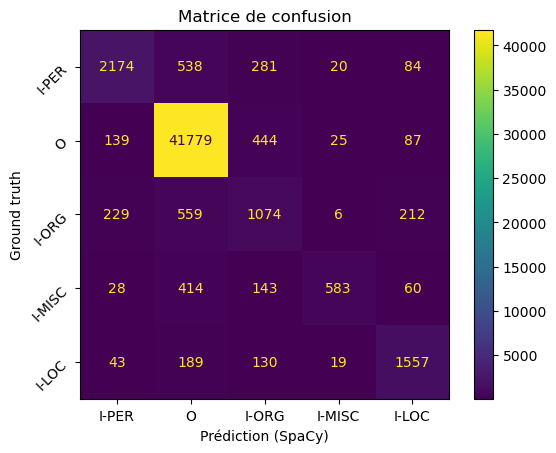

In [321]:

conf_matrix = confusion_matrix(test_tags, spacy_tags_conv, labels=unique_tags)
plt.figure(figsize=(10, 8))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_tags)
disp.plot()

plt.title('Matrice de confusion')
plt.ylabel('Ground truth')
plt.xlabel('Prédiction (SpaCy)')
plt.yticks(rotation=45)
plt.grid(False)
plt.plot()

In [322]:
# Créer un rapport d'évaluation de classification
class_report = classification_report(test_tags, spacy_tags_conv, target_names=['I-LOC', 'I-MISC', 'I-ORG', 'I-PER', 'O'])

# Afficher le rapport d'évaluation de classification
print(class_report)

              precision    recall  f1-score   support

       I-LOC       0.78      0.80      0.79      1938
      I-MISC       0.89      0.47      0.62      1228
       I-ORG       0.52      0.52      0.52      2080
       I-PER       0.83      0.70      0.76      3097
           O       0.96      0.98      0.97     42474

    accuracy                           0.93     50817
   macro avg       0.80      0.70      0.73     50817
weighted avg       0.93      0.93      0.93     50817



**4e.** Veuillez exécuter également le modèle 'en_core_web_lg' de spacy et afficher le rapport d'évaluation (mais pas la matrice de confusion).  Vous pouvez recopier ici le minimum de code nécessaire à l'obtention des résultats, avec une nouvelle pipeline spaCy appelée 'nlp2'.

In [127]:
# !python -m spacy download en_core_web_lg

     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     -------------------------------------- 0.1/587.7 MB 812.7 kB/s eta 0:12:04
     ---------------------------------------- 0.6/587.7 MB 4.6 MB/s eta 0:02:08
     ---------------------------------------- 1.6/587.7 MB 9.5 MB/s eta 0:01:02
     --------------------------------------- 2.8/587.7 MB 12.8 MB/s eta 0:00:46
     --------------------------------------- 3.9/587.7 MB 15.6 MB/s eta 0:00:38
     --------------------------------------- 4.9/587.7 MB 15.8 MB/s eta 0:00:37
     --------------------------------------- 6.1/587.7 MB 17.0 MB/s eta 0:00:35
     --------------------------------------- 7.3/587.7 MB 17.8 MB/s eta 0:00:33
      -------------------------------------- 8.5/587.7 MB 18.6 MB/s eta 0:00:32
      -------------------------------------- 9.6/587.7 MB 19.2 MB/s eta 0:00:31
      ------------------------------------- 10.7/587.7

In [323]:
nlp2 = spacy.load("en_core_web_lg")
spacy_tags2 = []
for sentence in test_tokens:
    doc = Doc(nlp2.vocab, words=sentence)
    nlp2.get_pipe("ner")(doc)
    for d in doc:
        spacy_tags2.append(d.ent_type_)
        
spacy_tags_conv2 = [convert_spacy_conll(tag) for tag in spacy_tags2]

class_report = classification_report(test_tags, spacy_tags_conv2, target_names=['I-LOC', 'I-MISC', 'I-ORG', 'I-PER', 'O'])

print(class_report)

              precision    recall  f1-score   support

       I-LOC       0.76      0.85      0.80      1938
      I-MISC       0.90      0.51      0.65      1228
       I-ORG       0.57      0.59      0.58      2080
       I-PER       0.90      0.83      0.86      3097
           O       0.97      0.98      0.98     42474

    accuracy                           0.94     50817
   macro avg       0.82      0.75      0.77     50817
weighted avg       0.94      0.94      0.94     50817



## 5. Discussion finale

Veuillez comparer les scores des trois modèles testés, en termes de **macro avg**.  Pourquoi ce score est-il le plus informatif ?  Veuillez indiquer également la taille des modèles spaCy évalués.

In [325]:
# NLTK offre une performance bien en deçà de Spacy, ce qui est notamment dû au fait que NLTK peine à distinguer les entités nommées. On remarque une sur-labelisation du tag O quand bien même il s'agit d'une NE dans le texte de référence. Dès lors, il est impossible de corriger la fonction de mapping tag NLTK => tag de référence pour augmenter la précision du modèle.
# On remarque que pour les pipelines de Spacy, la macro avg est légèrement plus élevée dans le modèle lg pour la précision, le rappel et le score f1 que pour le modèle sm. Ce qui semble logique étant donné que la taille des modèles diffèrent, et on peut s'attendre à ce qu'un modèle plus large dispose de plus d'informations pour identifier les entités nommées au détriment d'une taille (MB) plus grande. Toutefois, le gain de la macro avg n'est pas significatif (+ 0.04 en moyenne) alors que la taille du modèle et 46x plus importante.

# Le classement des macro avg final des modèles est le suivant : en_core_web_lg > en_core_web_sm > NLTK

# Le macro avg est plus adapté dans cette situation, car la classe 'O' est surreprésentée. Or la macro avg donne le même poids à toutes les classes, évitant ainsi une précision trop élevée qui serait biaisée par ladite surreprésentation de la classe 'O'.

# Le modèle 'en_core_web_sm' a une taille de 12 MB, tandis que le modèle 'en_core_web_lg' a une taille de 560 MB.



**Fin du Labo.** Veuillez nettoyer ce notebook en gardant seulement les résultats désirés, l'enregistrer, et le soumettre comme devoir sur Cyberlearn.